In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Missing values

In [2]:
df = pd.read_csv('train-missings.csv')

In [3]:
df.tail()

,Id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
15115,15116,2607.0,243.0,23.0,258.0,NaN,NaN,170.0,251.0,NaN,1282.0,0.0,0.0,NaN,3
15116,15117,2603.0,NaN,19.0,633.0,NaN,618.0,249.0,NaN,91.0,1325.0,0.0,0.0,1.0,3
15117,15118,NaN,134.0,25.0,365.0,NaN,NaN,250.0,220.0,NaN,1187.0,0.0,0.0,1.0,3
15118,15119,2487.0,167.0,28.0,218.0,101.0,242.0,229.0,NaN,119.0,NaN,0.0,0.0,1.0,3
15119,15120,2475.0,197.0,34.0,319.0,78.0,270.0,NaN,244.0,164.0,NaN,NaN,0.0,1.0,3


In [4]:
df.shape

(15120, 15)

In [5]:
df.columns

Index(['Id', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       'p11', 'p12', 'p13', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 15 columns):
Id        15120 non-null int64
p1        12156 non-null float64
p2        12188 non-null float64
p3        12096 non-null float64
p4        12071 non-null float64
p5        12083 non-null float64
p6        12057 non-null float64
p7        12151 non-null float64
p8        12035 non-null float64
p9        12073 non-null float64
p10       12152 non-null float64
p11       12031 non-null float64
p12       12031 non-null float64
p13       12198 non-null float64
target    15120 non-null int64
dtypes: float64(13), int64(2)
memory usage: 1.7 MB


In [7]:
df.nunique()

Id        15120
p1         1633
p2          361
p3           52
p4          379
p5          407
p6         2985
p7          171
p8          136
p9          246
p10        2525
p11           2
p12           2
p13           2
target        7
dtype: int64

### We have lots of null values ! 

In [8]:
count_nan = len(df) - df.count()
count_nan

Id           0
p1        2964
p2        2932
p3        3024
p4        3049
p5        3037
p6        3063
p7        2969
p8        3085
p9        3047
p10       2968
p11       3089
p12       3089
p13       2922
target       0
dtype: int64

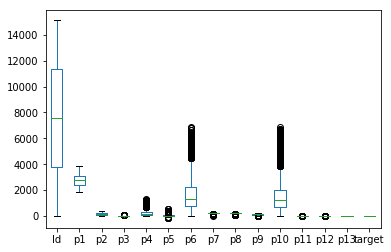

In [9]:
df.plot.box()

### We have outliers in almost all of feartures

### First approach 

For numeric features I fill missing values with mean of feature exluding outliers, for three last features which have only 2 value I fill missing with -1 because maybe it shows a situation that we can't get that features value!

In [10]:
col_mean = {}

In [11]:
for col in df.columns:
    if col in ['p11', 'p12', 'p13']: # boolean columns
        df[col] = df[col].fillna(-1)
        col_mean[col] = -1
        continue
    col_without_outliers = df[np.abs(df[col]-df[col].mean()) <= (3*df[col].std())][col]
    # keep only the ones that are within +3 to -3 standard deviations in the column col.
    mean = np.mean(col_without_outliers)
    col_mean[col] = mean
    df[col] = df[col].fillna(mean)

In [12]:
count_nan = len(df) - df.count()
count_nan

Id        0
p1        0
p2        0
p3        0
p4        0
p5        0
p6        0
p7        0
p8        0
p9        0
p10       0
p11       0
p12       0
p13       0
target    0
dtype: int64

In [13]:
df.describe()

,Id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2746.864676,155.722432,16.509545,223.252786,50.263408,1694.848174,212.811910,219.204696,135.032966,1493.800442,-0.013624,-0.178638,0.144511,4.000000
std,4364.91237,374.711560,98.598200,7.566462,186.637767,54.691147,1178.516254,27.332627,20.341267,40.915833,985.106822,0.628342,0.445042,0.714261,2.000066
min,1.00000,1879.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,3780.75000,2455.000000,79.000000,11.000000,90.000000,10.000000,900.000000,203.000000,212.000000,116.000000,840.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2746.864676,155.722432,16.447198,211.348024,47.606432,1657.209727,213.702620,219.761753,135.032966,1420.330754,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,2986.250000,208.000000,20.000000,283.000000,65.000000,1959.000000,231.000000,232.000000,159.000000,1766.000000,0.000000,0.000000,1.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1318.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1.000000,1.000000,7.000000


I can remove Id column, because It has not any useful information.

In [14]:
df = df.drop('Id', axis=1)

### Is dataset balanced ?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002536157A7F0>]],
      dtype=object)

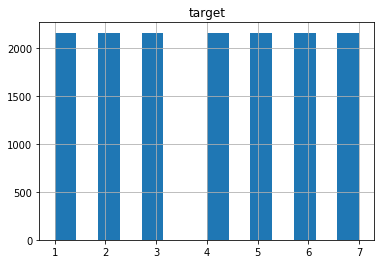

In [15]:
df.hist(column='target', bins=14)

In [16]:
df['target'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: target, dtype: int64

In [17]:
df['target'].nunique()

7

We have 7 class balanced dataset for classification.

### For now I can have small baseline for checking what I have done

I use Random Forrest.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
clf1 = RandomForestClassifier(n_estimators=100, min_samples_split=10)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], test_size=0.33, random_state=42)

In [21]:
clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
train_acc = accuracy_score(y_true=y_train, y_pred=clf1.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test))
print('Train acc: ', train_acc, 'Test acc: ', test_acc)

Train acc:  0.9591312931885488 Test acc:  0.7092184368737475


We totally overfitted but we just wanted to see baseline

### Let try another ways to fill null values

In [23]:
df = pd.read_csv('train-missings.csv')
df = df.drop('Id', axis=1)

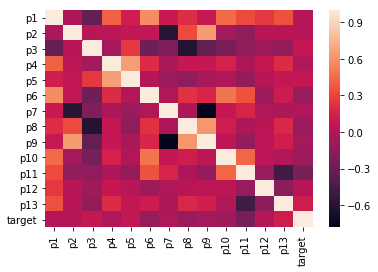

In [24]:
# Calculate and plot
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

We can see some features are correlated to each other, we can use this. We can estimate value of one missing feature with other features. I think more than 0.6 correlation is enough. I use simple linear regressor. and also I normalize input features.

In [25]:
correlated = np.where((np.abs(corr_matrix) > 0.6) & (corr_matrix != 1))

For example I can use features p2, p7 and p8 for estimating missing values of p9. I can fill missing values of p2, p7 and p8 with previous approach.

In [26]:
col_names = list(df.columns)
col_names

['p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'target']

In [27]:
from collections import defaultdict

In [28]:
features_estimators = defaultdict(list)
for target_featur, estimator in zip(*correlated):
    features_estimators[col_names[target_featur]].append(col_names[estimator])
features_estimators

defaultdict(list,
            {'p2': ['p9'],
             'p3': ['p8'],
             'p4': ['p5'],
             'p5': ['p4'],
             'p7': ['p9'],
             'p8': ['p3', 'p9'],
             'p9': ['p2', 'p7', 'p8']})

In [29]:
from sklearn.linear_model import Lasso

In [30]:
def fill_df(df, cols):
    for col in cols:
        col_without_outliers = df[np.abs(df[col]-df[col].mean()) <= (3*df[col].std())][col]
        # keep only the ones that are within +3 to -3 standard deviations in the column col.
        mean = np.mean(col_without_outliers)
        df[col] = df[col].fillna(mean)
    return df

In [31]:
df.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [32]:
original_df = df.copy()
for feat, estim in features_estimators.items():
    print(feat, estim)
    df_with_null_fea = df[original_df[feat].isnull()]
    df = fill_df(df, estim)
    regressor = Lasso(normalize=True)
    without_null = df[~original_df[feat].isnull()]
    regressor.fit(without_null[estim], without_null[feat])
    df_with_null_fea = df[original_df[feat].isnull()]
    estimated = regressor.predict(df_with_null_fea[estim])
    original_df[feat] = pd.Series(estimated)

p2 ['p9']
p3 ['p8']
p4 ['p5']
p5 ['p4']
p7 ['p9']
p8 ['p3', 'p9']
p9 ['p2', 'p7', 'p8']


In [33]:
dropped_null_df = df.dropna()

In [34]:
for col in df.columns:
    if col in ['p11', 'p12', 'p13']: # boolean columns
        df[col] = df[col].fillna(-1)
        continue
    col_without_outliers = df[np.abs(df[col]-df[col].mean()) <= (3*df[col].std())][col]
    # keep only the ones that are within +3 to -3 standard deviations in the column col.
    mean = np.mean(col_without_outliers)
    df[col] = df[col].fillna(mean)

In [35]:
clf = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], test_size=0.33, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
train_acc = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print('Train acc: ', train_acc, 'Test acc: ', test_acc)

Train acc:  1.0 Test acc:  0.7062124248496994


We get better accuracy, but I think it's not good enough by cost, because we have lots of parameter to save for application usage. In first approach we just need to save some statistics of our trained data. I didn't much on model selection and maybe we can get better results with same data and Neural Networks.

## Saving model for application usage 

In [37]:
from sklearn.externals import joblib
import pickle

In [39]:
joblib.dump(clf1, 'trained_random_forrest_v1.joblib') 
with open('means_for_v1', 'wb') as f:
    pickle.dump(col_mean, f)

In [41]:
with open('means_for_v1', 'rb') as f:
    stats = pickle.load(f)

In [42]:
stats

{'Id': 7560.5,
 'p1': 2746.864675880224,
 'p2': 155.72243190022974,
 'p3': 16.447198275862068,
 'p4': 211.34802431610942,
 'p5': 47.60643211016878,
 'p6': 1657.2097274633124,
 'p7': 213.70261954261954,
 'p8': 219.76175312159558,
 'p9': 135.03296612275324,
 'p10': 1420.3307537012113,
 'p11': -1,
 'p12': -1,
 'p13': -1,
 'target': 4.0}